# Zadanie 1

Zaimplementować perceptronową regułę uczenia. Algorytm powinien działać dla:
a) dowolnego wymiaru danych uczących (wersja podstawowa – max 8 pkt) oraz
b) dowolnej liczby neuronów w warstwie (wersja rozszerzona).
Sprawdzić działanie zaimplementowanego algorytmu na ręcznie stworzonym zbiorze danyh.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron_learning(X, d, epochs=100, num_neurons=1):
   num_samples, num_features = X.shape
   weights = np.random.rand(num_neurons, num_features)
   biases = np.random.rand(num_neurons)
   weights_before_learning = weights.copy()
   biases_before_learning = biases.copy()

   for epoch in range(epochs):
       errors = 0
       indices = np.arange(num_samples)
       np.random.shuffle(indices)
       X, d = X[indices], d[indices]
       for i in range(num_samples):
           net = np.dot(weights, X[i]) + biases
           y = np.where(net >= 0, 1, -1)

           e = d[i] - y
           weights += np.outer(e, X[i])
           biases += e

           errors += np.sum(e != 0)

       if errors == 0:
           break

   return weights_before_learning, weights, biases_before_learning, biases, epoch + 1

def plot_decision_boundary(X, weights, bias):
   plt.figure(figsize=(8, 6))

   plt.scatter(X[:, 0], X[:, 1], color='blue')

   x_vals = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
   y_vals = -(weights[0, 0] * x_vals + bias[0]) / weights[0, 1]
   plt.plot(x_vals, y_vals, color='red')


   plt.title("Granica decyzyjna perceptrona")
   plt.xlabel("x1")
   plt.ylabel("x2")
   plt.show()

[[-3.49151045 -1.91422147]] [6.31734361] 8


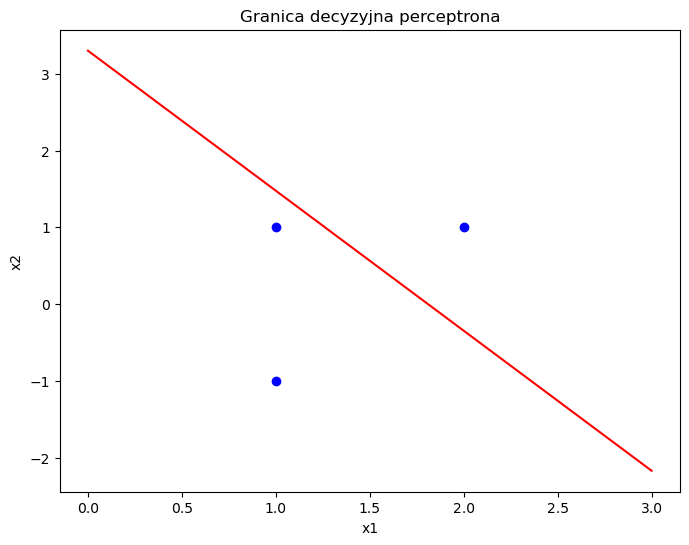

In [2]:
X_train = np.array([
   [1, -1],
   [1, 1],
   [2, 1],
])

d_train = np.array([
   [1],
   [1],
   [-1],
])

weights_before_learning, weights, biases_before_learning, biases, num_epochs = perceptron_learning(X_train, d_train, epochs=1000, num_neurons=1)
print(weights, biases, num_epochs)

plot_decision_boundary(X_train, weights, biases)

# Zadanie 2a

Rozwiązać problem AND i OR (dla odpowiednich dwuwymiarowych danych wejściowych , 0 i 1, neuron powinien zwracać na wyjściu odpowiadające im wartości funkcji AND i OR):
a) Samodzielnie (bez uczenia): zdefiniować neuron dyskretny wyznaczając jego wartości wag.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

In [4]:
def neuron_output(X, w, bias):
    y = []
    for x in X:
        net = bias + np.dot(w, x)
        y.append(1 if net >= 0 else 0)
    return y

AND

In [5]:
w_and = np.array([1, 1])
b_and = -1.5

In [6]:
y_and = neuron_output(X, w_and, b_and)
print("Wyjścia dla AND:", y_and)

Wyjścia dla AND: [0, 0, 0, 1]


OR

In [7]:
w_or = np.array([1, 1])
b_or = -0.5

In [8]:
y_or = neuron_output(X, w_or, b_or)
print("Wyjścia dla OR:", y_or)

Wyjścia dla OR: [0, 1, 1, 1]


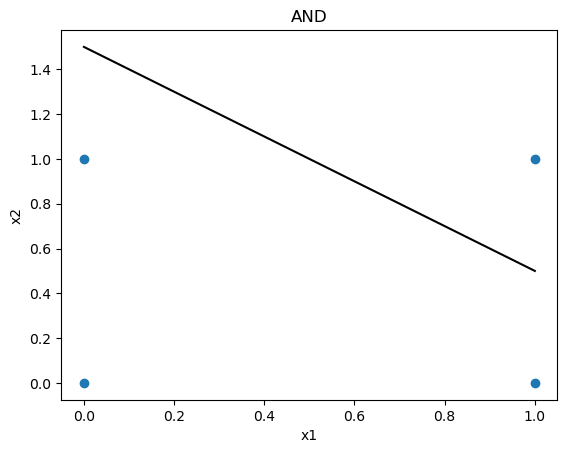

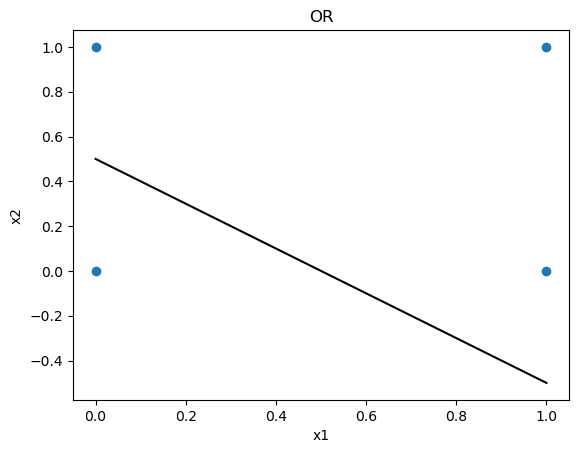

In [9]:
def boundary_plot(X, w, bias, title):
    plt.scatter(X[:, 0], X[:, 1])
    x1 = np.linspace(0, 1, 2)
    x2 = -(w[0] * x1 + bias) / w[1]
    plt.plot(x1, x2, color='black')
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

boundary_plot(X, w_and, b_and, "AND")
boundary_plot(X, w_or, b_or, "OR")

# Zadanie 2b

Wykorzystując regułę perceptronową: przeanalizować wstępne (losowe) wagi neuronów, a następnie wagi po uczeniu. Ile iteracji wymagał proces uczenia? Narysować położenie prostych reprezentujących neuron po inicjalizacji wag oraz otrzymane rozwiązania.

AND
Wagi przed uczeniem:
[[0.38421052 0.76024347]]
Wagi po uczeniu:
[[2.38421052 2.76024347]]
Próg przed uczeniem:
[0.15820453]
Próg po uczeniu:
[-3.84179547]
Liczba epok:
7


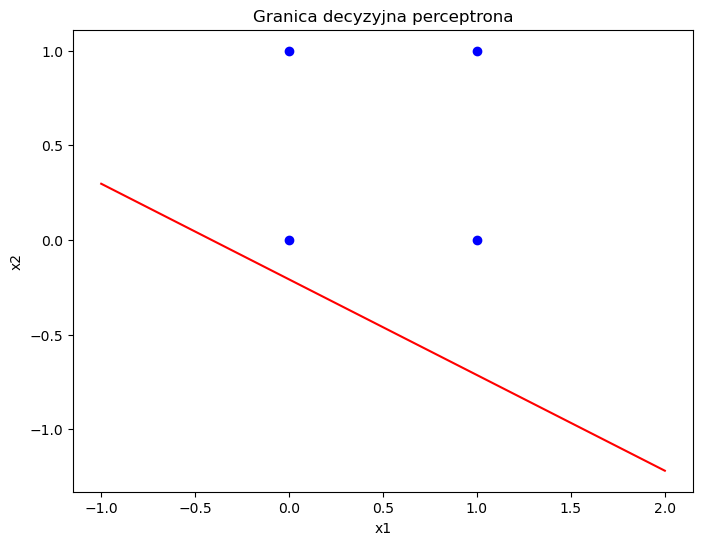

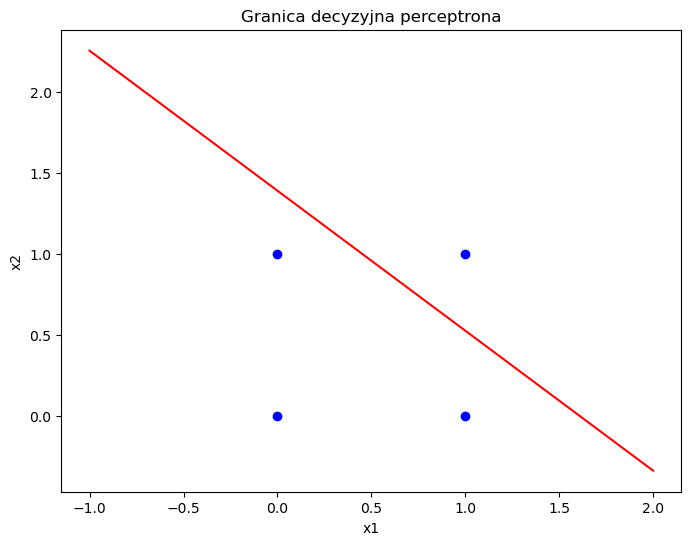

OR
Wagi przed uczeniem:
[[0.66131897 0.4693303 ]]
Wagi po uczeniu:
[[2.66131897 2.4693303 ]]
Próg przed uczeniem:
[0.04091571]
Próg po uczeniu:
[-1.95908429]
Liczba epok:
4


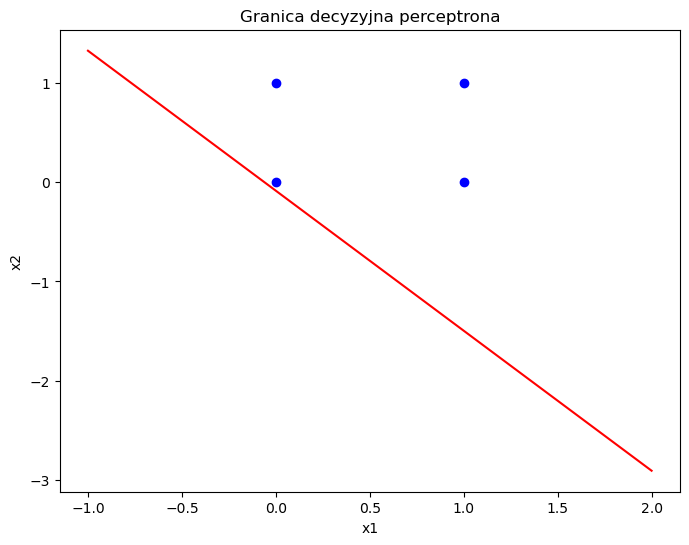

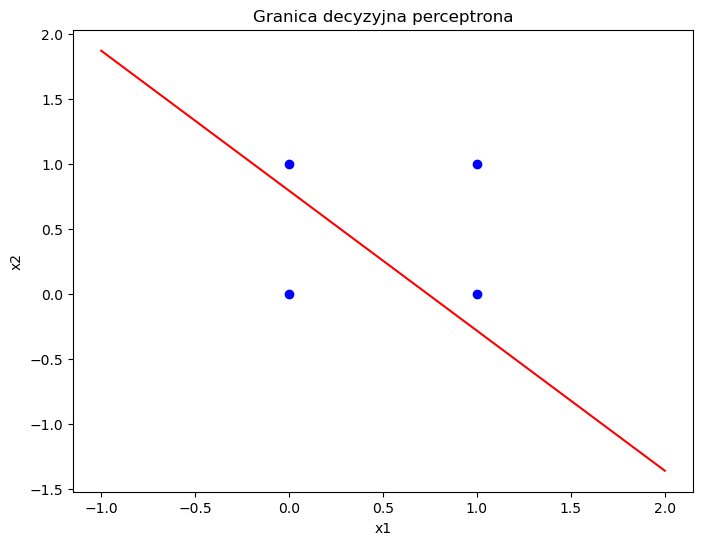

In [10]:
X_train = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

d_train_and = np.array([
    [-1],
    [-1],
    [-1],
    [1]
])

d_train_or = np.array([
    [-1],
    [1],
    [1],
    [1]
])

print("AND")
weights_before_learning, weights, biases_before_learning, biases, num_epochs = perceptron_learning(X_train, d_train_and, epochs=1000, num_neurons=1)
print("Wagi przed uczeniem:")
print(weights_before_learning)
print("Wagi po uczeniu:")
print(weights)
print("Próg przed uczeniem:")
print(biases_before_learning)
print("Próg po uczeniu:")
print(biases)
print("Liczba epok:")
print(num_epochs)
plot_decision_boundary(X_train, weights_before_learning, biases_before_learning)
plot_decision_boundary(X_train, weights, biases)

print("OR")
weights_before_learning, weights, biases_before_learning, biases, num_epochs = perceptron_learning(X_train, d_train_or, epochs=1000, num_neurons=1)
print("Wagi przed uczeniem:")
print(weights_before_learning)
print("Wagi po uczeniu:")
print(weights)
print("Próg przed uczeniem:")
print(biases_before_learning)
print("Próg po uczeniu:")
print(biases)
print("Liczba epok:")
print(num_epochs)
plot_decision_boundary(X_train, weights_before_learning, biases_before_learning)
plot_decision_boundary(X_train, weights, biases)
